In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import sklearn.linear_model
import sklearn.preprocessing
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import wrangle_module

In [2]:
permits = pd.read_csv('permits.csv')
permits.shape

(76892, 17)

In [3]:
permits.Permit_approved = pd.to_datetime(permits.Permit_approved)
permits.Permit_submitted = pd.to_datetime(permits.Permit_submitted)
permits = permits.set_index(permits.Permit_approved).sort_index()

In [4]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76892 entries, 2016-01-04 to 2021-12-30
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Permit_approved       76892 non-null  datetime64[ns]
 1   Status_Date           76892 non-null  object        
 2   Status                76892 non-null  int64         
 3   API_NO.               76892 non-null  int64         
 4   Operator_Name_Number  76892 non-null  object        
 5   Lease_Name            76892 non-null  object        
 6   Well                  76892 non-null  object        
 7   District              76892 non-null  object        
 8   County                76892 non-null  object        
 9   Wellbore_Profile      76892 non-null  object        
 10  Filing_Purpose        76892 non-null  object        
 11  Amend                 76892 non-null  object        
 12  Total_Depth           76892 non-null  int64         
 13 

- Approval_time is an object, should be datetime or integer/float

In [5]:
# permits.Approval_time = pd.to_datetime(permits.Approval_time)
# this code won't work bc it's in string format--i resolved by addressing it in the wrangle module

In [6]:
permits.head(1)

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,APPROVED,2016-01-04,0,EAGLE FORD


In [7]:
permits.describe()

,Status,API_NO.,Total_Depth,Approval_time_days
count,76892.000000,7.689200e+04,76892.000000,76892.000000
mean,842509.209294,2.950391e+07,9954.407780,12.629870
std,22431.405938,1.289433e+07,3732.362647,33.585786
min,70969.000000,1.008200e+05,150.000000,0.000000
25%,827731.750000,2.253134e+07,8000.000000,3.000000
50%,843171.000000,3.174117e+07,10000.000000,6.000000
75%,858770.250000,3.893654e+07,12000.000000,13.000000
max,875615.000000,7.063026e+07,28010.000000,2989.000000


In [8]:
permits.index.min(), permits.index.max(), permits.index.max()-permits.index.min()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timedelta('2187 days 00:00:00'))

- from the beginning of 2016 to the end of 2021

In [9]:
permits.Current_Queue.value_counts()

APPROVED    76892
Name: Current_Queue, dtype: int64

- all rows are in approved status

In [10]:
permits.isna().sum()

Permit_approved         0
Status_Date             0
Status                  0
API_NO.                 0
Operator_Name_Number    0
Lease_Name              0
Well                    0
District                0
County                  0
Wellbore_Profile        0
Filing_Purpose          0
Amend                   0
Total_Depth             0
Current_Queue           0
Permit_submitted        0
Approval_time_days      0
SHALE                   0
dtype: int64

- drop Stacked_Lateral_Parent_Well_DP, which is almost all na's
- drop the very few na's in wellbore and shale
#### Done in the wrangle file

In [11]:
permits.Lease_Name.nunique()

30402

- many duplicated lease names, but we are keeping these bc the same lease name can file multiple times for different wells/reasons

In [12]:
permits.County.value_counts()

REEVES        6447
MIDLAND       6393
MARTIN        5401
HOWARD        3913
LOVING        3902
              ... 
BREWSTER         1
CORYELL          1
DEAF SMITH       1
FANNIN           1
FLOYD            1
Name: County, Length: 220, dtype: int64

In [13]:
len(permits.County.unique())

220

- there are 220 texas counties represented in this data

In [14]:
permits.head(1)

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,APPROVED,2016-01-04,0,EAGLE FORD


array([[<AxesSubplot:title={'center':'Permit_approved'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>],
       [<AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>]],
      dtype=object)

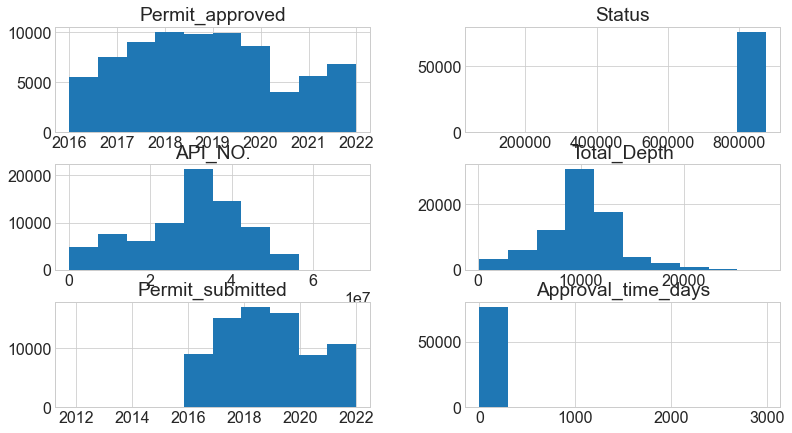

In [15]:
permits.hist()

- well depth is normally distributed
- notice a dropoff in permits in 2020--covid related downturn, for sure
- some of the permits were submitted as early as 2012
- almost all approval times were a matter of a couple of days, with a couple of outliers
- not familiar with the meaning of the status or api number, would be good to investigate

<AxesSubplot:>

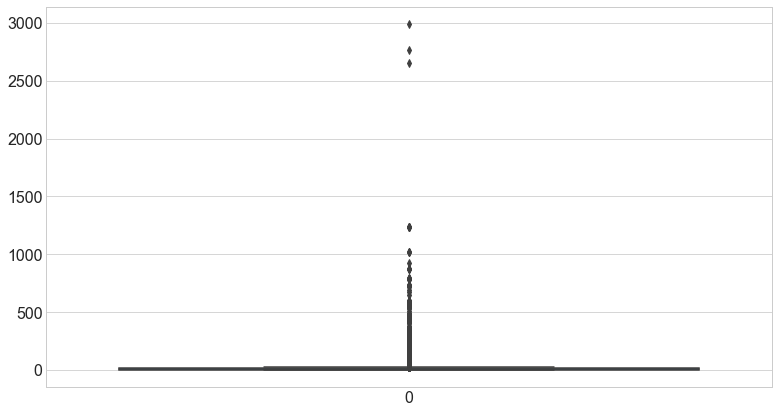

In [16]:
sns.boxplot(data=permits.Approval_time_days)

array([[<AxesSubplot:title={'center':'Permit_approved'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>],
       [<AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>]],
      dtype=object)

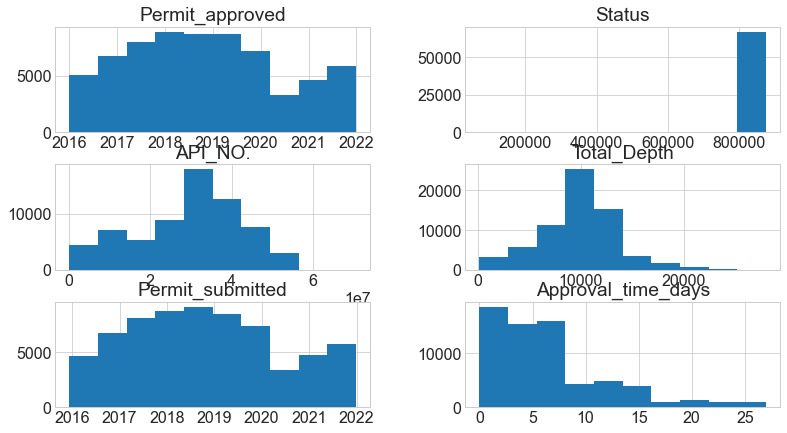

In [18]:
permits = wrangle_module.remove_outliers(permits, 1.5, ['Approval_time_days'])
permits.hist()

- the remove outliers feature, which i will implement in the wrangle_module, takes care of those extreme approval times, and hence the early permit submissions

In [19]:
permits.columns

Index(['Permit_approved', 'Status_Date', 'Status', 'API_NO.',
       'Operator_Name_Number', 'Lease_Name', 'Well', 'District', 'County',
       'Wellbore_Profile', 'Filing_Purpose', 'Amend', 'Total_Depth',
       'Current_Queue', 'Permit_submitted', 'Approval_time_days', 'SHALE'],
      dtype='object')

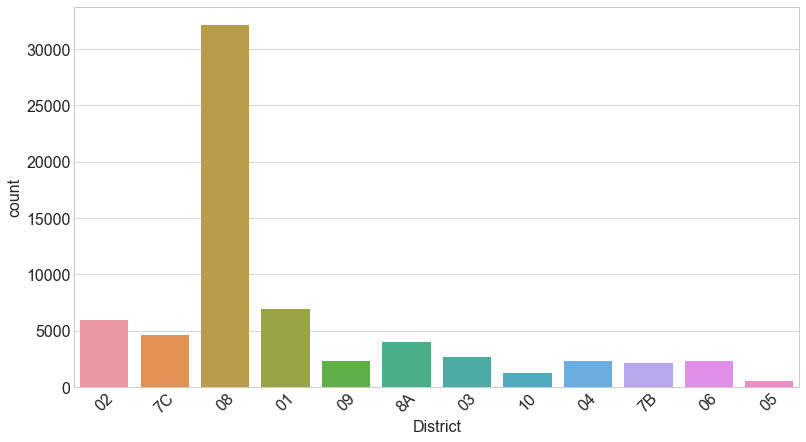

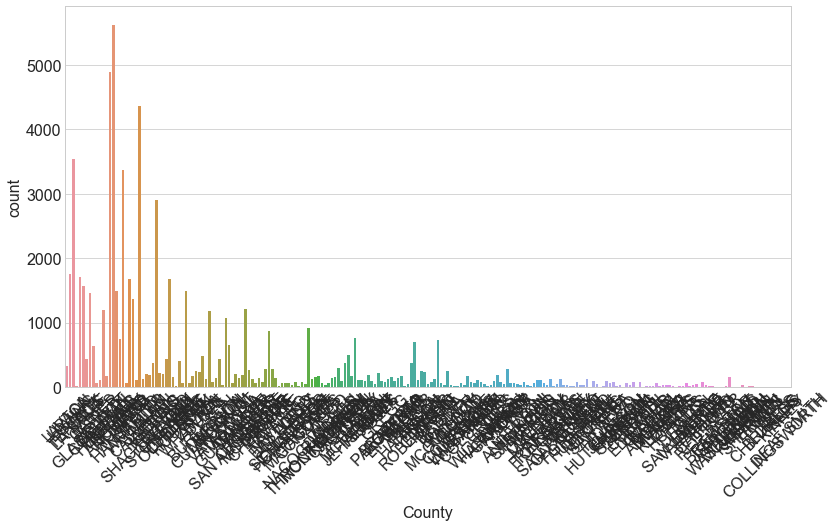

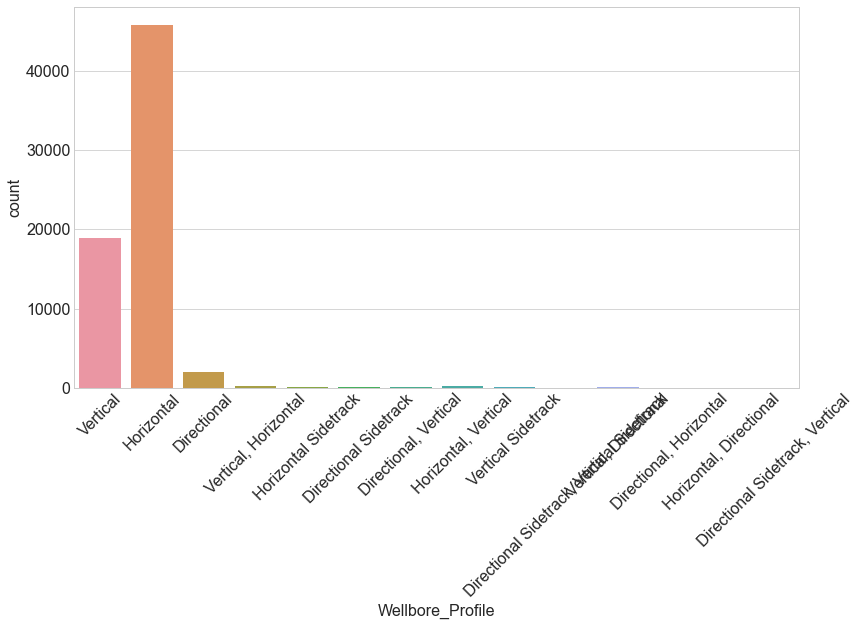

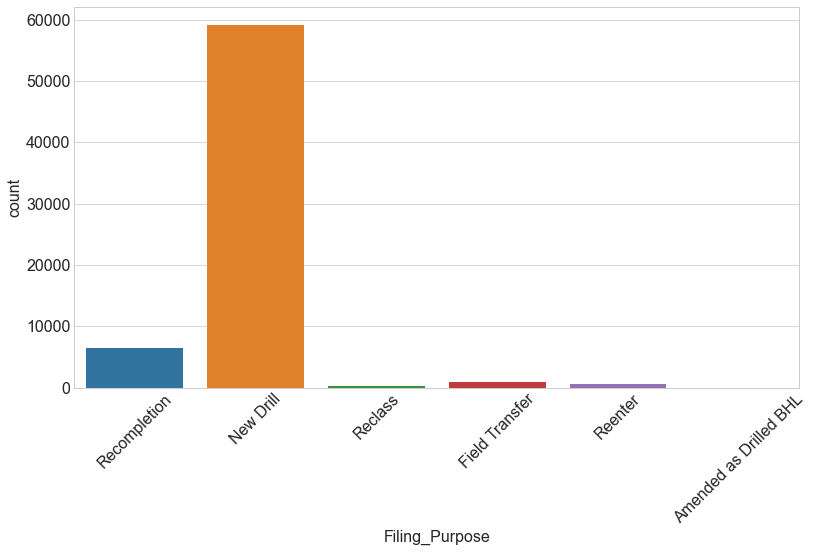

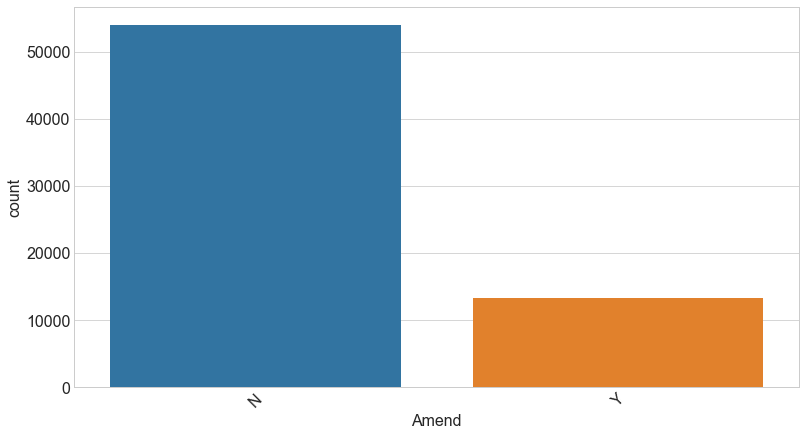

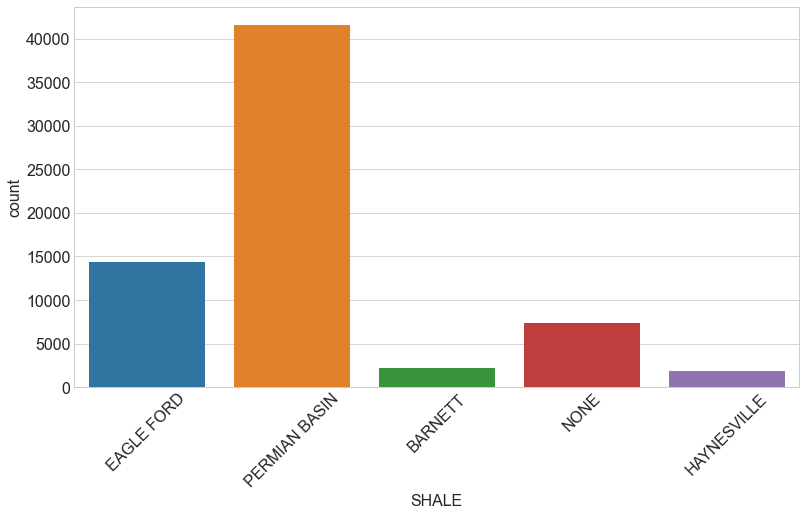

In [20]:
disc_vars = ['District', 'County','Wellbore_Profile', 'Filing_Purpose', 'Amend','SHALE']
for var in disc_vars:
    plt.figure()
    sns.countplot(x=var,data=permits)
    plt.xticks(rotation = 45)

- District 8 is far and away the biggest for drilling permits
- There are six counties with considerably higher permitting--explore this more
- Horizontal wells are surprisingly the most common for permitting, followed by vertical.  Presumably due to the prevalence of fracking
- Almost everything is new drilling--consider dropping the rest of the filing purposes
- Relatively few ammended permits, but enough to take into account. Explo further?
- The Permian is far and away the highest area for permitting, followed by the eagleford shale.  

<AxesSubplot:xlabel='Permit_approved', ylabel='Approval_time_days'>

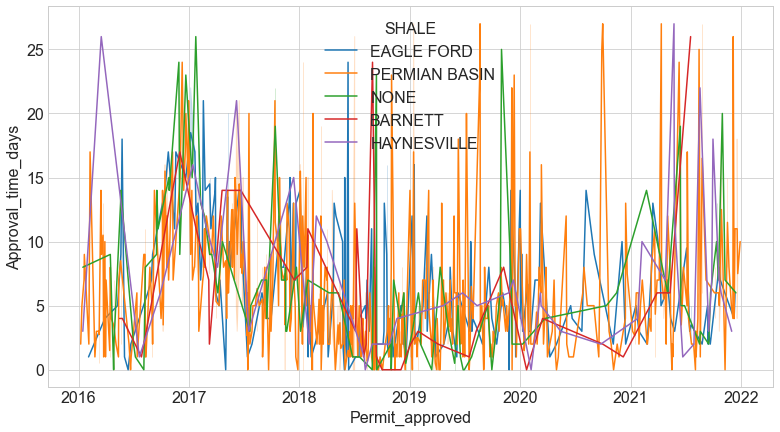

In [21]:
temp = permits.sample(1000)
sns.lineplot(data=temp,x=temp.index, y= 'Approval_time_days', hue = 'SHALE')

- Nothing too helpful in this graph

In [22]:
permits.County.value_counts().tail(50)

JOHNSON          19
UPSHUR           19
FOARD            18
TITUS            18
TRINITY          17
COMANCHE         17
BAYLOR           17
HALE             17
NAVARRO          17
JEFF DAVIS       17
OLDHAM           17
LUBBOCK          17
MOTLEY           16
ARANSAS          14
SHERMAN          13
TERRELL          12
SAN JACINTO      12
MORRIS           12
FALLS            11
WILLACY          10
MENARD           10
LYNN             10
WILLIAMSON        9
RED RIVER         8
GRAY              7
PRESIDIO          6
ERATH             6
MCLENNAN          5
FRANKLIN          5
KAUFMAN           4
CAMERON           4
HILL              3
CHILDRESS         3
HALL              3
SAN SABA          3
HOPKINS           3
ELLIS             2
SABINE            2
TRAVIS            2
HUNT              2
COLLINGSWORTH     1
KINNEY            1
BRISCOE           1
BELL              1
CORYELL           1
BREWSTER          1
DEAF SMITH        1
FANNIN            1
MILLS             1
FLOYD             1


### The top counties by permit requests:
- REEVES      5627
- MIDLAND     4883
- MARTIN      4361
- LOVING      3539
- HOWARD      3364
- KARNES      2903

<AxesSubplot:>

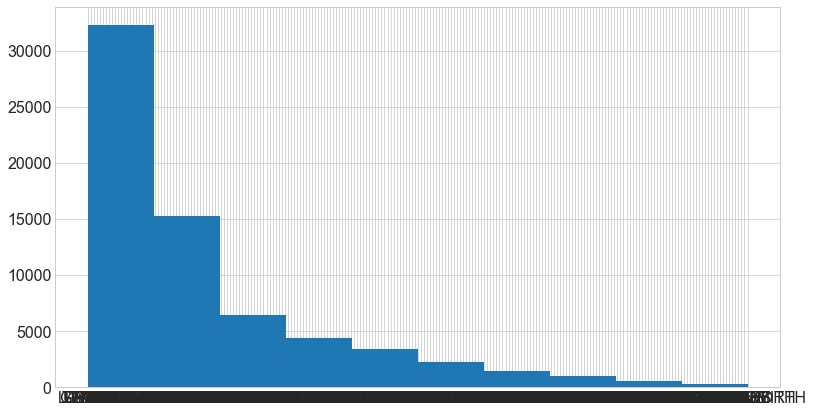

In [34]:
permits.County.hist()

<AxesSubplot:xlabel='Permit_approved'>

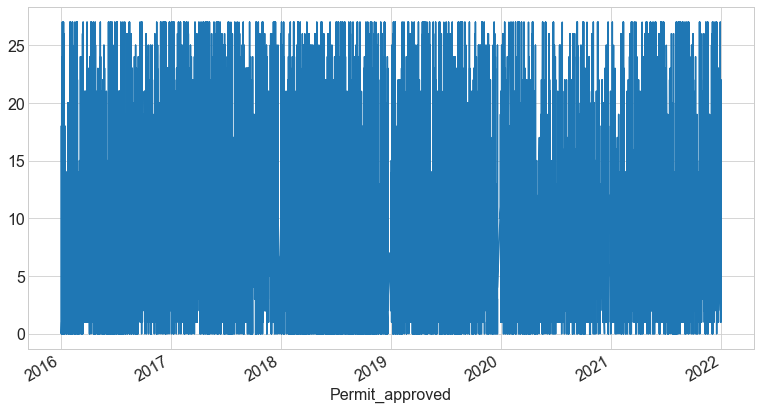

In [23]:
y = permits.Approval_time_days
y.plot()

## Splitting the data here for further explo
- for the time being, i will not pursue the time series analysis perspective and will do a typical split, pending further exploration

In [24]:
df, train, validate, test, X_train, y_train, X_validate, y_validate, X_test, \
y_test, train_scaled, X_train_scaled, y_train_scaled, validate_scaled, \
X_validate_scaled, y_validate_scaled, test_scaled, X_test_scaled, y_test_scaled = \
wrangle_module.wrangle_df()


In [33]:
train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, \
X_validate.shape, y_validate.shape, X_test.shape, y_test.shape, train_scaled.shape, \
X_train_scaled.shape, y_train_scaled.shape, validate_scaled.shape, \
X_validate_scaled.shape, y_validate_scaled.shape, test_scaled.shape, \
X_test_scaled.shape, y_test_scaled.shape

((37718, 16),
 (16166, 16),
 (13471, 16),
 (37718, 15),
 (37718, 1),
 (16166, 15),
 (16166, 1),
 (13471, 15),
 (13471, 1),
 (37718, 2),
 (37718, 1),
 (37718, 1),
 (16166, 2),
 (16166, 1),
 (16166, 1),
 (13471, 2),
 (13471, 1),
 (13471, 1))

In [31]:
X_train_scaled.shape

(37718, 1)

In [32]:
df

(       Total_Depth  Approval_time_days
 0         0.461235            0.000000
 1         0.360732            0.111111
 2         0.292534            0.296296
 3         0.420818            0.074074
 4         0.299713            0.481481
 ...            ...                 ...
 37713     0.194365            0.555556
 37714     0.317624            0.259259
 37715     0.335607            0.592593
 37716     0.227925            0.222222
 37717     0.353553            0.111111
 
 [37718 rows x 2 columns],
        Total_Depth
 0         0.461235
 1         0.360732
 2         0.292534
 3         0.420818
 4         0.299713
 ...            ...
 37713     0.194365
 37714     0.317624
 37715     0.335607
 37716     0.227925
 37717     0.353553
 
 [37718 rows x 1 columns],
        Approval_time_days
 0                0.000000
 1                0.111111
 2                0.296296
 3                0.074074
 4                0.481481
 ...                   ...
 37713            0.555556
 37714

In [ ]:
def split_permits(df):
    '''
    Takes in the permits dataframe and returns train, validate, test subset dataframes
    '''
    # SPLIT
    # Test set is .2 of original dataframe
    train, test = train_test_split(df, test_size = .2, random_state=123)
    # The remainder is here divided .7 to train and .3 to validate
    train, validate = train_test_split(train, test_size=.3, random_state=123)

    # return train, validate, test

    X_train = train.drop(columns=['Approval_time_days'])
    y_train = pd.DataFrame(train.Approval_time_days, columns=['Approval_time_days'])

    X_validate = validate.drop(columns=['Approval_time_days'])
    y_validate = pd.DataFrame(validate.Approval_time_days, columns=['Approval_time_days'])

    X_test = test.drop(columns=['Approval_time_days'])
    y_test = pd.DataFrame(test.Approval_time_days, columns=['Approval_time_days'])

    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
split_permits(permits)

In [ ]:
train.shape, \
validate.shape, \
test.shape, \
X_train.shape, \
y_train.shape, \
X_validate.shape, \
y_validate.shape, \
X_test.shape, \
y_test.shape

In [ ]:
train.info()

### List some variables you want to plot against Approval_time_days
- SHALE
- Total_Depth
- Amend
- Filing_purpose
- Wellbore_Profile
- County
- District

### These are all categorical with the exception of Total_Depth



In [ ]:
train[train.District == '05'].Approval_time_days.mean()

In [ ]:
for var in disc_vars:
    plt.figure()
    sns.barplot(y= train.Approval_time_days, x=var,data=train)
    plt.xticks(rotation = 45)
    plt.tight_layout()

- District 5 has a slightly higher approval time, but this would need to be shown with some statistical testing
- There are a few particularly slow counties for permitting, it would be interesting to isolate and explore these
- filing purpose has virtually no relation to approval time, amend as well
- all shales have almost identical approval times; haynesville is a tiny bit more, but stats testing would be required to show this for sure
- directional horizontal wells have a slightly shorter approval time. However, there are only three wellbore profiles with significant numbers: horizontal, vertical, and directional.  To the extent the rest might need to be dropped

In [ ]:
train[train.Wellbore_Profile == 'Directional, Horizontal']

In [ ]:
permits.Wellbore_Profile.value_counts()

- There are only 3 wellbore profiles of much any significance: horizontal, vertical, and directional

In [ ]:
train[train.Approval_time_days > 15].County.value_counts()#.head(10)

In [ ]:
train.groupby(by='County').Approval_time_days.mean().sort_values().tail(11)

- The above is the list of counties with mean approval times over ten days

In [ ]:
train.groupby(by='County').Approval_time_days.mean().sort_values().head(11)

- And the counties with a mean approval time less than 4 days

- taking a break but i need to find out the number of approvals for these counties, to get a better understanding of why they are at the extremes

In [ ]:
quick_counties = \
['HILL',
'WILLIAMSON',
'SHERMAN',
'HALE', 
'KAUFMAN',
'CHILDRESS',
'WALLER',
'LAMB',  
'MENARD',
'WILLACY',
'FOARD']

In [ ]:
for county in quick_counties:
    print(len(train[train.County == county]))

- There are exceedingly few permit approvals for these counties on the bottom end of the approval times

In [ ]:
slow_counties = ['DALLAS', 'FALLS', 'BREWSTER', 'SAN JACINTO', 'MCLENNAN', 'RED RIVER',
       'HUNT', 'TITUS', 'SABINE', 'FLOYD', 'HOPKINS']

In [ ]:
for county in slow_counties:
    print(len(train[train.County == county]))

- likewise, there are few observations in the slow counties

In [ ]:
len(train[train.County == 'REEVES'])

In [ ]:
# train.County.value_counts().tail(30)

In [ ]:
sns.violinplot(data=train, y = 'Total_Depth', x = 'Approval_time_days')

- not a clear conclusion, this would be ripe for a levene then ANOVA test for differing variance

### Running a levene test to check on the variances between the populations above:

- H_0: The variances of the approval times by total depth are the same in all populations
- H_A: The variance in the populations is different

In [ ]:
stats.levene(
train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
train[train.Approval_time_days==20].Total_Depth,
train[train.Approval_time_days==21].Total_Depth,
train[train.Approval_time_days==22].Total_Depth,
train[train.Approval_time_days==23].Total_Depth,
train[train.Approval_time_days==24].Total_Depth,
train[train.Approval_time_days==25].Total_Depth,
train[train.Approval_time_days==26].Total_Depth,
train[train.Approval_time_days==27].Total_Depth,
)

- the variances are not equal

### Kruskal-Wallace testing (since the variances are unequal):

- H_O: The population means for the different well depths (by approval time) is the same
- H_a: These population means are different

In [ ]:
alpha = .05

In [ ]:
for i in [train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
train[train.Approval_time_days==20].Total_Depth,
train[train.Approval_time_days==21].Total_Depth,
train[train.Approval_time_days==22].Total_Depth,
train[train.Approval_time_days==23].Total_Depth,
train[train.Approval_time_days==24].Total_Depth,
train[train.Approval_time_days==25].Total_Depth,
train[train.Approval_time_days==26].Total_Depth,
train[train.Approval_time_days==27].Total_Depth]:
    plt.figure(figsize=(4,3))
    i.hist()
    plt.show()

- These are generally normally distributed

In [ ]:
f, p = stats.kruskal(
train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
train[train.Approval_time_days==20].Total_Depth,
train[train.Approval_time_days==21].Total_Depth,
train[train.Approval_time_days==22].Total_Depth,
train[train.Approval_time_days==23].Total_Depth,
train[train.Approval_time_days==24].Total_Depth,
train[train.Approval_time_days==25].Total_Depth,
train[train.Approval_time_days==26].Total_Depth,
train[train.Approval_time_days==27].Total_Depth)

f, p

In [ ]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

- I can proceed with the understanding that the Total_depth by approval time has significant difference from one group to the next.

In [ ]:
train.SHALE.value_counts()

In [ ]:
train.SHALE.value_counts().index

In [ ]:
shales = ['PERMIAN BASIN', 'EAGLE FORD', 'NONE', 'BARNETT', 'HAYNESVILLE']
for shale in shales:
    print(train[train.SHALE == shale].Approval_time_days.mean())

- The Permian Basin is fastest for approval; the Haynesville is slowest.  Stats testing here:

### Running a levene test to check on the variances between the populations above:

- H_0: The variances of the approval times by SHALE are the same in all populations
- H_A: The variance in the populations is different

In [ ]:
stats.levene(
train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days
)

- The null hypothesis cannot be rejected; the variances may be equal

In [ ]:
train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days.var(),

In [ ]:
train[train.SHALE == 'EAGLE FORD'].Approval_time_days.var(),

In [ ]:
train[train.SHALE == 'NONE'].Approval_time_days.var(),

In [ ]:
train[train.SHALE == 'BARNETT'].Approval_time_days.var(),

In [ ]:
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days.var()

In [ ]:
for i in [train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days]:
    i.hist()

- also, not normally distributed

### Chi ^ 2 testing to follow:

- H_O: Shale is independent of the number of days to approval
- H_a: Shale plays a role in the length of time to approval

In [ ]:
n = train.shape[0]

In [ ]:
shale_proportion = train.SHALE.value_counts() / n

In [ ]:
shale_proportion

In [ ]:
approval_time_proportion = train.Approval_time_days.value_counts() / n
approval_time_proportion

In [ ]:
expected = pd.DataFrame()

for shale, s_prop in shale_proportion.iteritems():
    for approval_time, a_prop in approval_time_proportion.iteritems():
        expected.loc[approval_time, shale] = s_prop * a_prop

expected.sort_index(inplace=True)
expected

In [ ]:
expected *= n
expected

In [ ]:
observed = pd.crosstab(train.SHALE, train.Approval_time_days).T
observed

In [ ]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

In [ ]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [ ]:
stats.chi2(degrees_of_freedom).sf(chi2)


- a miniscule p value; the null hypothesis can be rejected
### The chi^2 test demonstrates that the length of time to approval is related to the shale formation

In [ ]:
train.head()

In [ ]:
train.corr()